In [1]:
import pandas as pd

In [2]:
url='https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
fuel_data = pd.read_csv(url, error_bad_lines=False)
fuel_data.describe(include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2005_12_134_0_7,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [3]:
fuel_data.duplicated().any()

False

In [4]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [5]:
fuel_data.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [6]:
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')


In [7]:
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [8]:
fuel_data.groupby('report_year')['report_year'].count()

report_year
1994    1235
1995    1201
1996    1088
1997    1094
1998    1107
1999    1050
2000    1373
2001    1356
2002    1205
2003    1211
2004    1192
2005    1269
2006    1243
2007    1264
2008    1228
2009    1222
2010    1261
2011    1240
2012    1243
2013    1199
2014    1171
2015    1093
2016    1034
2017     993
2018     951
Name: report_year, dtype: int64

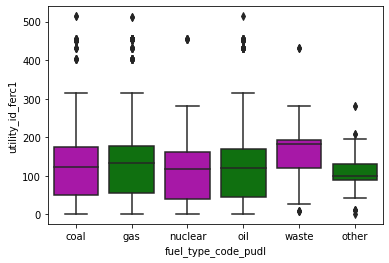

In [9]:
import seaborn as sns

# Box plot
sns.boxplot(x="fuel_type_code_pudl", y="utility_id_ferc1",
            palette=["m", "g"], data=fuel_data)

Text(0.5, 0, 'Fuel Unit')

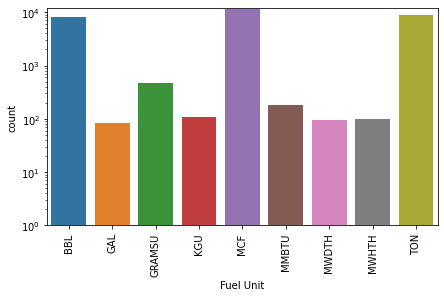

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.xticks(rotation=90)
fuel_unit = pd.DataFrame({'unit':['BBL', 'GAL', 'GRAMSU', 'KGU', 'MCF', 'MMBTU', 'MWDTH', 'MWHTH', 'TON'],
            'count':[7998, 84, 464, 110, 11354, 180, 95, 100, 8958]})
sns.barplot(data=fuel_unit, x='unit', y='count')
plt.xlabel('Fuel Unit')

#Because of the extreme range of the values for the fuel unit, we can plot the barchart by taking the logarithm of the y-axis as follows:


g = sns.barplot(data=fuel_unit, x='unit', y='count')
g.set_yscale("log")
g.set_ylim(1, 12000)
plt.xlabel('Fuel Unit')

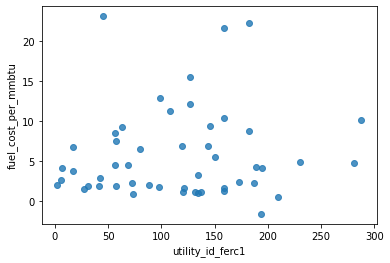

In [11]:
# Select a sample of the dataset
sample_df = fuel_data.sample(n=50, random_state=4)
sns.regplot(x=sample_df["utility_id_ferc1"], y=sample_df["fuel_cost_per_mmbtu"], fit_reg=False)

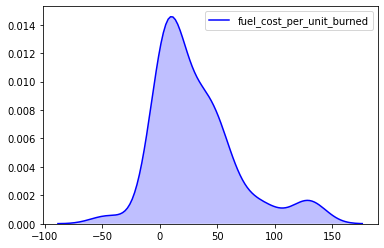

In [12]:
sns.kdeplot(sample_df['fuel_cost_per_unit_burned'], shade=True, color="b")

### fuel_type_code_pudl with lowest average fuel_cost_per_unit_burned

In [13]:
fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()

fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

In [14]:
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [15]:
fuel_data['fuel_mmbtu_per_unit'].std()

10.600220307806714

In [16]:
fuel_data['fuel_mmbtu_per_unit'].quantile(0.75)

17.006

In [17]:
fuel_data['fuel_qty_burned'].skew()

15.851495469109503

In [18]:
fuel_data['fuel_qty_burned'].kurt()

651.3694501337732

In [19]:
import numpy as np

In [20]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [21]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [22]:
url='https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
fuel_data = pd.read_csv(url, error_bad_lines=False)

# Column with null values

In [23]:
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [24]:
fuel_data.shape

(29523, 11)

In [25]:
(180/29523)*100 #Percentage

0.609694136774718

### Correlation

In [26]:
fuel_data.corr()

,utility_id_ferc1,report_year,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
utility_id_ferc1,1.000000,0.093323,-0.057447,-0.066946,-0.037863,-0.016414,0.006122
report_year,0.093323,1.000000,0.012952,-0.110853,0.013599,-0.014043,0.010261
fuel_qty_burned,-0.057447,0.012952,1.000000,-0.080946,-0.018535,-0.003551,-0.001896
fuel_mmbtu_per_unit,-0.066946,-0.110853,-0.080946,1.000000,-0.010034,-0.009039,-0.005884
fuel_cost_per_unit_burned,-0.037863,0.013599,-0.018535,-0.010034,1.000000,0.011007,-0.000437
fuel_cost_per_unit_delivered,-0.016414,-0.014043,-0.003551,-0.009039,0.011007,1.000000,-0.000109
fuel_cost_per_mmbtu,0.006122,0.010261,-0.001896,-0.005884,-0.000437,-0.000109,1.000000


### Percentage of fuel_cost_per_unit_burned in 1998 compared to 1994

In [27]:
f_coal = fuel_data[fuel_data['fuel_type_code_pudl']=='coal']

In [28]:
f_coal.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922,44.24,43.25,1.850


In [29]:
f_coal.groupby('report_year')['fuel_cost_per_unit_burned'].sum()

report_year
1994     14984.572
1995     14571.785
1996     12694.803
1997     43742.178
1998     11902.597
1999     16303.468
2000    100428.831
2001     15109.012
2002      9171.164
2003     30954.110
2004      9632.063
2005     11107.182
2006     12402.684
2007     12965.171
2008     14331.348
2009     45554.858
2010     88627.745
2011     17001.015
2012     17546.097
2013     17629.860
2014     15412.197
2015     13338.235
2016     11100.925
2017     10254.284
2018      9488.197
Name: fuel_cost_per_unit_burned, dtype: float64

In [30]:
(11902.597 - 14984.572)*100/14984.572

-20.567654518260518

### Year with highest average fuel_cost_per_unit_delivered

In [31]:
fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean()

report_year
1994       63.636060
1995       32.735269
1996     9196.705948
1997    11140.197239
1998      287.154420
1999       25.551627
2000      985.362877
2001       60.050396
2002       47.594361
2003       55.663493
2004      139.524275
2005       41.438184
2006       38.657484
2007       43.325023
2008       58.588197
2009      652.694163
2010       91.862105
2011       59.774667
2012       60.994502
2013      172.307591
2014      192.737183
2015      326.535511
2016      103.901761
2017       46.196861
2018      499.269966
Name: fuel_cost_per_unit_delivered, dtype: float64